# 회귀_연습_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler


from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [4]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮김.

In [8]:
nfeatures = x_train.shape[1]
nfeatures

18

In [13]:
# 메모리 최적화
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(9, input_shape=(nfeatures,), activation='relu'),
                    Dense(6, activation='relu'),
                    Dense(1)])

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 238 (952.00 Byte)
Trainable params: 238 (952.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [14]:
model.compile(optimizer=Adam(0.1), loss='mse')

hist = model.fit(x_train, y_train, epochs=50, validation_split=.2, verbose=0).history

* 학습곡선

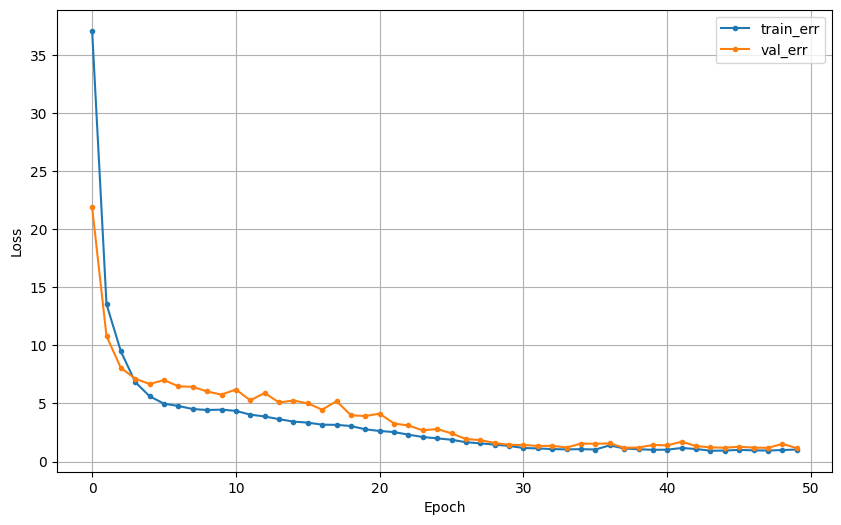

In [15]:
dl_history_plot(hist)

* 검증

In [16]:
pred = model.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE : {mean_absolute_error(y_val, pred)}')
# print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

3/3 [==============================] - 0s 5ms/step
RMSE : 1.314701470875425
MAE : 1.1228548890352248


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮김

In [ ]:
# 메모리 최적화
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential( [Dense(4, input_shape=(nfeatures,), activation='relu'),
                      Dense(1)])

# 모델 요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 76        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
model2.compile(optimizer=Adam(0.1), loss='mse')

hist2 = model2.fit(x_train, y_train, epochs=30, validation_split=.2).history

Epoch 1/30
8/8 [==============================] - 0s 19ms/step - loss: 24.5126 - val_loss: 15.0151
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 10.7680 - val_loss: 10.1293
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 7.2649 - val_loss: 11.8881
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 6.5616 - val_loss: 7.0870
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 5.4683 - val_loss: 8.4469
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 5.2419 - val_loss: 6.4918
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 4.6421 - val_loss: 6.7525
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 4.2321 - val_loss: 6.1477
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 4.0683 - val_loss: 5.7947
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 3.8948 - val_loss: 6.3732
Epoch 11/30
8/8 [================

* 학습곡선

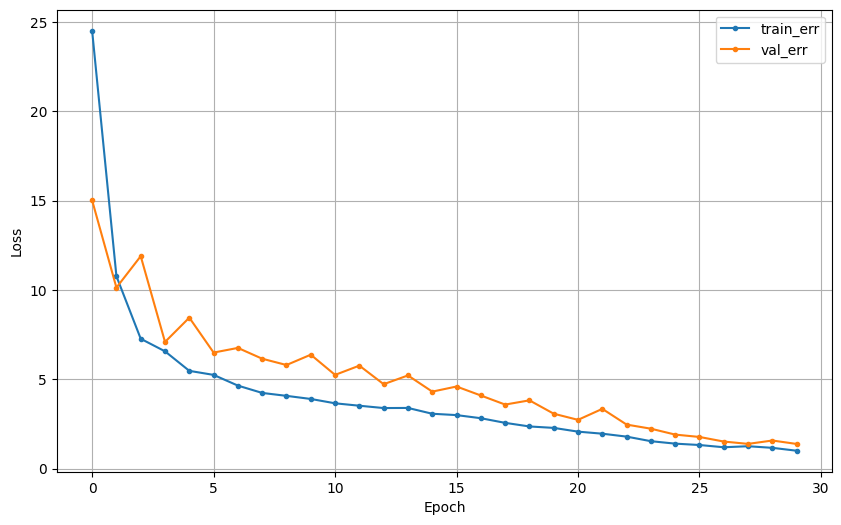

In [ ]:
dl_history_plot(hist2)

* 검증

In [ ]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE : {mean_absolute_error(y_val, pred2)}')
# print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

3/3 [==============================] - 0s 3ms/step
RMSE : 1.3123734339338642
MAE : 1.068386602461338


### (3) 모델3

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮김

In [ ]:
# 메모리 최적화
clear_session()

# Sequential 타입 모델 선언
model3 = Sequential( [Dense(8, input_shape=(nfeatures,), activation='relu'),
                      Dense(4, activation='relu'),
                      Dense(1)])

# 모델 요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 152       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
model3.compile(optimizer=Adam(0.05), loss='mse')

hist3 = model3.fit(x_train, y_train, epochs=30, validation_split=.2).history

Epoch 1/30
8/8 [==============================] - 1s 16ms/step - loss: 53.6144 - val_loss: 25.2235
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 13.6204 - val_loss: 21.9509
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 10.1529 - val_loss: 10.5287
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 8.3698 - val_loss: 8.4548
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 6.3358 - val_loss: 9.1858
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 5.2277 - val_loss: 7.3087
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 5.3236 - val_loss: 7.6293
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 4.8027 - val_loss: 6.8225
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 4.4848 - val_loss: 7.1115
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 4.2063 - val_loss: 6.3016
Epoch 11/30
8/8 [===============

* 학습곡선

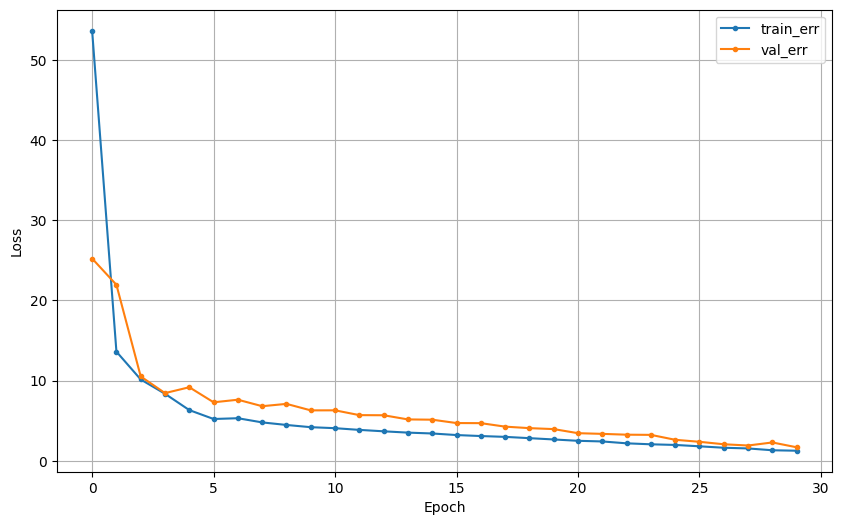

In [ ]:
dl_history_plot(hist3)

* 검증

In [ ]:
pred3 = model3.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE : {mean_absolute_error(y_val, pred3)}')
# print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

3/3 [==============================] - 0s 2ms/step
RMSE : 1.4230208401780877
MAE : 1.130710133433342
